In [1]:
library('survival')
library('survminer')

event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)
time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_disease_progression.tsv', sep='\t')
sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'X9q33', 'response_best_response_first_line', 'therapy_first_line')]
df = merge(merge(event, time, by='ID'), sensitivity, by='ID')
df$status <- ifelse(df$disease_status == 'Died', 1, 0)
df <- df[!is.na(df$X9q33),]
res.cox <- coxph(Surv(days_to_disease_progression, status) ~ X9q33, data=df)

summary(res.cox)

Warning message:
"package 'survival' was built under R version 3.6.3"Warning message:
"package 'survminer' was built under R version 3.6.3"Loading required package: ggplot2
Loading required package: ggpubr
Warning message:
"package 'ggpubr' was built under R version 3.6.3"Loading required package: magrittr


Call:
coxph(formula = Surv(days_to_disease_progression, status) ~ X9q33, 
    data = df)

  n= 560, number of events= 258 

                      coef exp(coef) se(coef)      z Pr(>|z|)
X9q33Detected     -0.08174   0.92151  0.15012 -0.544    0.586
X9q33Not Detected -0.01660   0.98354  0.15798 -0.105    0.916

                  exp(coef) exp(-coef) lower .95 upper .95
X9q33Detected        0.9215      1.085    0.6866     1.237
X9q33Not Detected    0.9835      1.017    0.7216     1.340

Concordance= 0.511  (se = 0.018 )
Likelihood ratio test= 0.34  on 2 df,   p=0.8
Wald test            = 0.34  on 2 df,   p=0.8
Score (logrank) test = 0.34  on 2 df,   p=0.8


In [2]:
colnames(read.csv('data/input.tsv', sep='\t'))

[1] "ID"                                              
 [2] "cmmc"                                            
 [3] "ecog_ps"                                         
 [4] "cell_markers"                                    
 [5] "dna_index"                                       
 [6] "lgh"                                             
 [7] "lgl"                                             
 [8] "percent_aneuploid"                               
 [9] "percent_plama_cells_bone_marrow"                 
[10] "percent_plama_cells_peripherical_blood"          
[11] "creatinine"                                      
[12] "iss"                                             
[13] "absolute_neutrophil"                             
[14] "platelet"                                        
[15] "wbc_x10_10_9_l"                                  
[16] "bun"                                             
[17] "crp"                                             
[18] "glucose"                                         
[19] "total_protein"                                   
[20] "albumin"                                         
[21] "beta_2_microglobulin"                            
[22] "calcium"                                         
[23] "hemoglobin"                                      
[24] "ldh"                                             
[25] "age"                                             
[26] "family_cancer"                                   
[27] "gender"                                          
[28] "race"                                            
[29] "hyperdiploid_flag"                               
[30] "X13q14"                                          
[31] "X13q34"                                          
[32] "X17p13"                                          
[33] "X1q21"                                           
[34] "X11p15"                                          
[35] "X15q15"                                          
[36] "X19q13"                                          
[37] "X20q13"                                          
[38] "X21q22"                                          
[39] "X3q21"                                           
[40] "X5q31"                                           
[41] "X7q22"                                           
[42] "X9q33"                                           
[43] "t_11_14_ccnd1"                                   
[44] "t_12_14_ccnd2"                                   
[45] "t_14_16_maf"                                     
[46] "t_14_20_mafb"                                    
[47] "t_4_14_whsc1"                                    
[48] "t_6_14_ccnd3"                                    
[49] "t_8_14_mafa"                                     
[50] "t_8_14_myc"                                      
[51] "lga"                                             
[52] "lgg"                                             
[53] "lgl_kappa"                                       
[54] "lgl_lambda"                                      
[55] "lgm"                                             
[56] "m_protein"                                       
[57] "therapy_first_line"                              
[58] "therapy_first_line_class"                        
[59] "first_line_transplant"                           
[60] "response_best_response_first_line"               
[61] "response_days_to_disease_progression"            
[62] "response_days_to_first_response"                 
[63] "response_best_response_and_days_to_first_therapy"

Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
"There are no survival curves to be compared. 
 This is a null model."

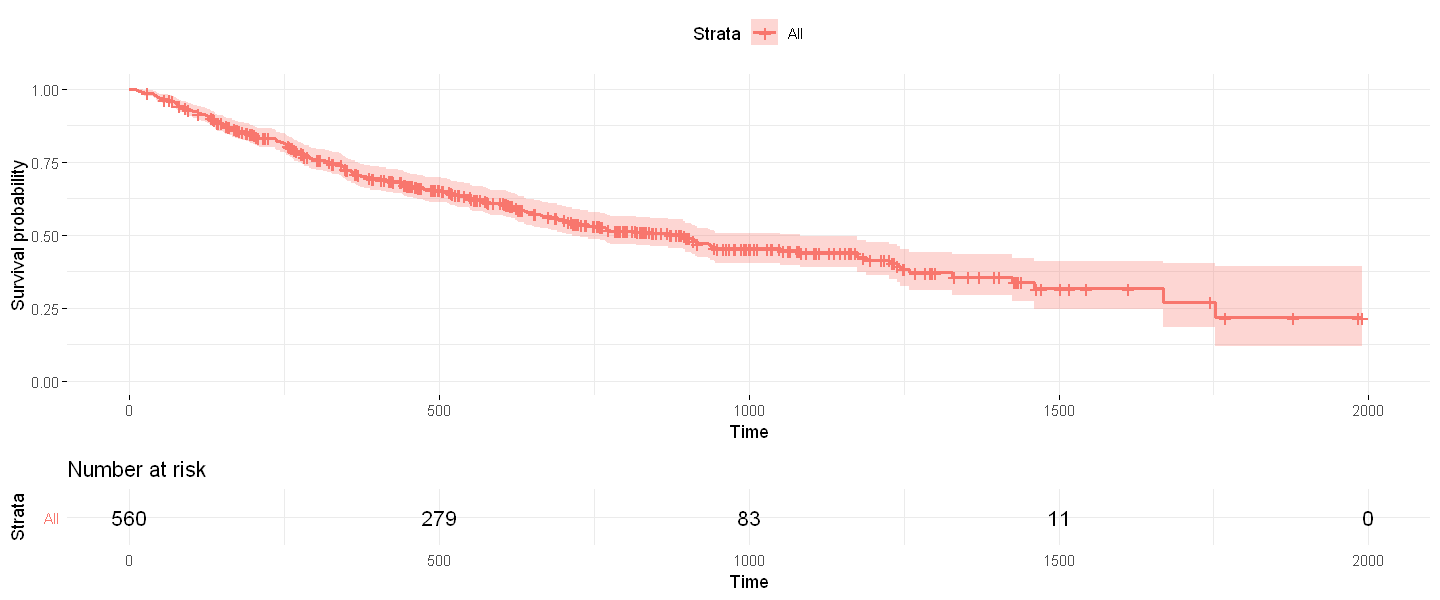

In [3]:
fit <- survfit(Surv(days_to_disease_progression, status) ~ 1, data = df)

options(repr.plot.width=12, repr.plot.height=5)

p <- ggsurvplot(fit, data=df, ggtheme = theme_minimal(), risk.table = TRUE, pval = TRUE);

ggsave('images/survival_overall.png', print(p), units='cm', heigh=12, width=26, bg="transparent")

p

[1] 395
Call:
coxph(formula = Surv(days_to_disease_progression, status) ~ response_best_response_first_line, 
    data = df)

  n= 368, number of events= 152 
   (27 observations deleted due to missingness)

                                     coef exp(coef) se(coef)      z Pr(>|z|)
response_best_response_first_line -1.4489    0.2348   0.3879 -3.735 0.000188
                                     
response_best_response_first_line ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                                  exp(coef) exp(-coef) lower .95 upper .95
response_best_response_first_line    0.2348      4.259    0.1098    0.5023

Concordance= 0.561  (se = 0.011 )
Likelihood ratio test= 21.96  on 1 df,   p=3e-06
Wald test            = 13.95  on 1 df,   p=2e-04
Score (logrank) test = 16.54  on 1 df,   p=5e-05



Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


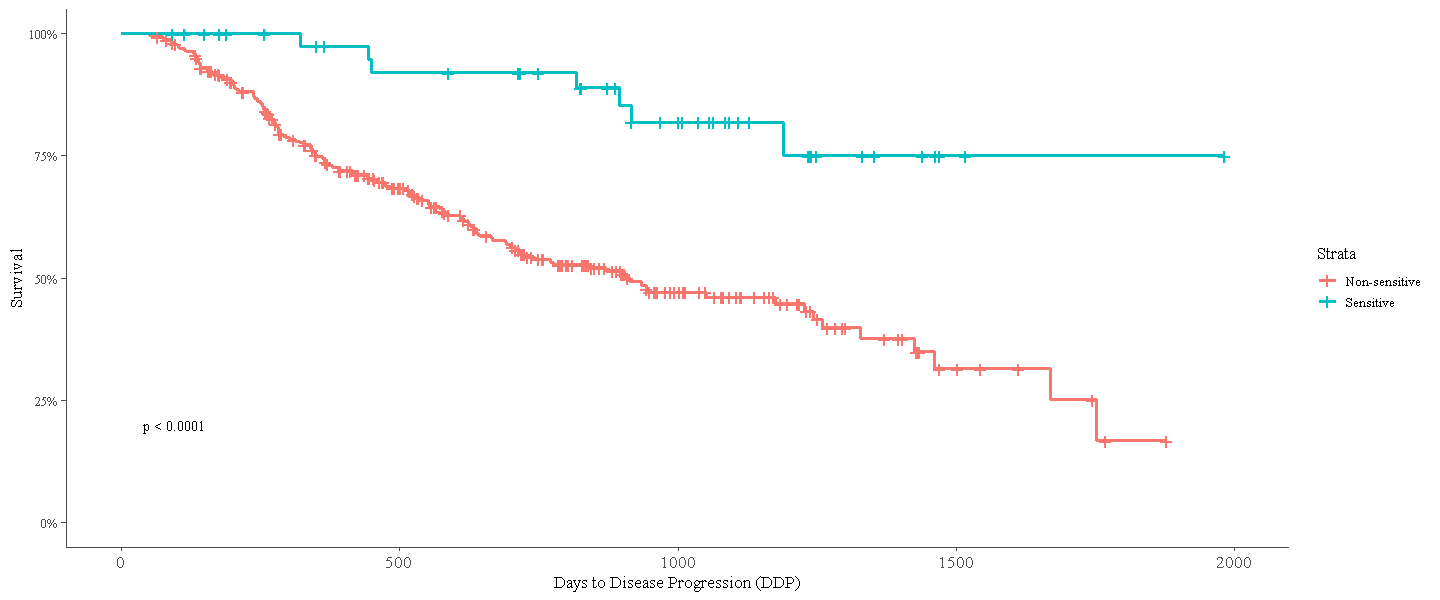

In [13]:
event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)
time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_disease_progression.tsv', sep='\t')
sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'X9q33', 'response_best_response_first_line', 'therapy_first_line')]
therapy_class = read.csv('data/mmrf/therapy/therapy_first_line_class.tsv', sep='\t')
df = merge(merge(merge(event, time, by='ID'), sensitivity, by='ID'), therapy_class, by='ID')
df$status <- ifelse(df$disease_status == 'Died', 1, 0)
df <- df[df$therapy_first_line != '',]
print(nrow(df))
# colnames(df)[4] <- 'Treatment_Sensitivity'

fit <- coxph(Surv(days_to_disease_progression, status) ~ response_best_response_first_line, data = df)

print(summary(fit))

fit <- survfit(Surv(days_to_disease_progression, status) ~ response_best_response_first_line, data = df)

ggtheme <- theme_bw() + 
  theme(panel.border          = element_blank(), 
        panel.grid.major      = element_blank(),
        panel.grid.minor      = element_blank(), 
        axis.line             = element_line(colour = "grey30"),
        text                  = element_text(size = 10, family="serif"),
        legend.key.size       = unit(10, "pt"),
        axis.text.x           = element_text(size = 10, colour='grey30'),
        axis.title.x          = element_text(vjust = 1),
        axis.ticks            = element_line(color='grey30'),
        plot.background       = element_rect(fill = "transparent", color = NA), # bg of the plot
        legend.box.background = element_rect(color = NA, fill = "transparent"), # get rid of legend panel bg
        legend.background     = element_rect(colour = NA, size = 0),
        legend.position       = "right",
        legend.key            = element_rect(fill = "transparent", colour = NA) # get rid of key legend fill, 
                                                                                #and of the surrounding
       )

p <- ggsurvplot(fit, data=df,
                risk.table = F, 
                pval = TRUE, 
                pval.size=3,
                legend.labs=c('Non-sensitive', 'Sensitive'),
                fontsize=11, 
                font.family='serif',
                legend='right',
                ggtheme=ggtheme) + 
        xlab('Days to Disease Progression (DDP)') +
        ylab('Survival')  

p$plot <- p$plot + scale_y_continuous(labels = scales::percent) + ggtheme

ggsave('images/survival_sensitivity.pdf', p$plot, units='cm', heigh=6, width=18, bg="transparent")

options(repr.plot.width=12, repr.plot.height=5)

p$plot + ggtheme

Warning message:
"Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2."

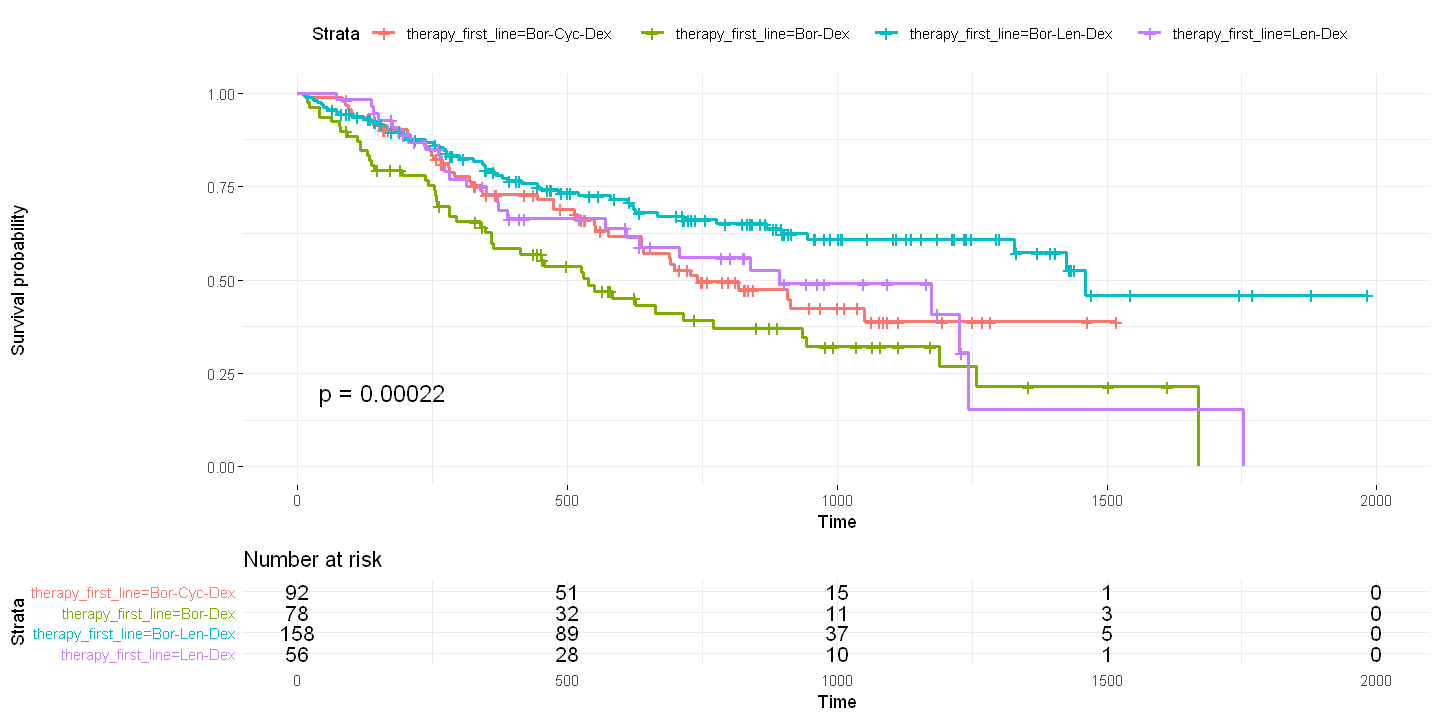

In [5]:
therapies <- c('Bor-Cyc-Dex', 'Bor-Dex', 'Bor-Len-Dex', 'Len-Dex', '')

df_therapy <- df[df$therapy_first_line %in% therapies,]

df_therapy$therapy_first_line = as.character(df_therapy$therapy_first_line)

df_therapy[df_therapy$therapy_first_line == '', 'therapy_first_line'] <- 'Non-therapy'

fit <- survfit(Surv(days_to_disease_progression, status) ~ therapy_first_line, data = df_therapy)

options(repr.plot.width=12, repr.plot.height=6)

p <- ggsurvplot(fit, data=df_therapy, ggtheme = theme_minimal(), risk.table = TRUE, pval = TRUE);

ggsave('images/survival_therapy_first_line.pdf', print(p), units='cm', heigh=17, width=30, bg="transparent")

p

Warning message:
"Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2."

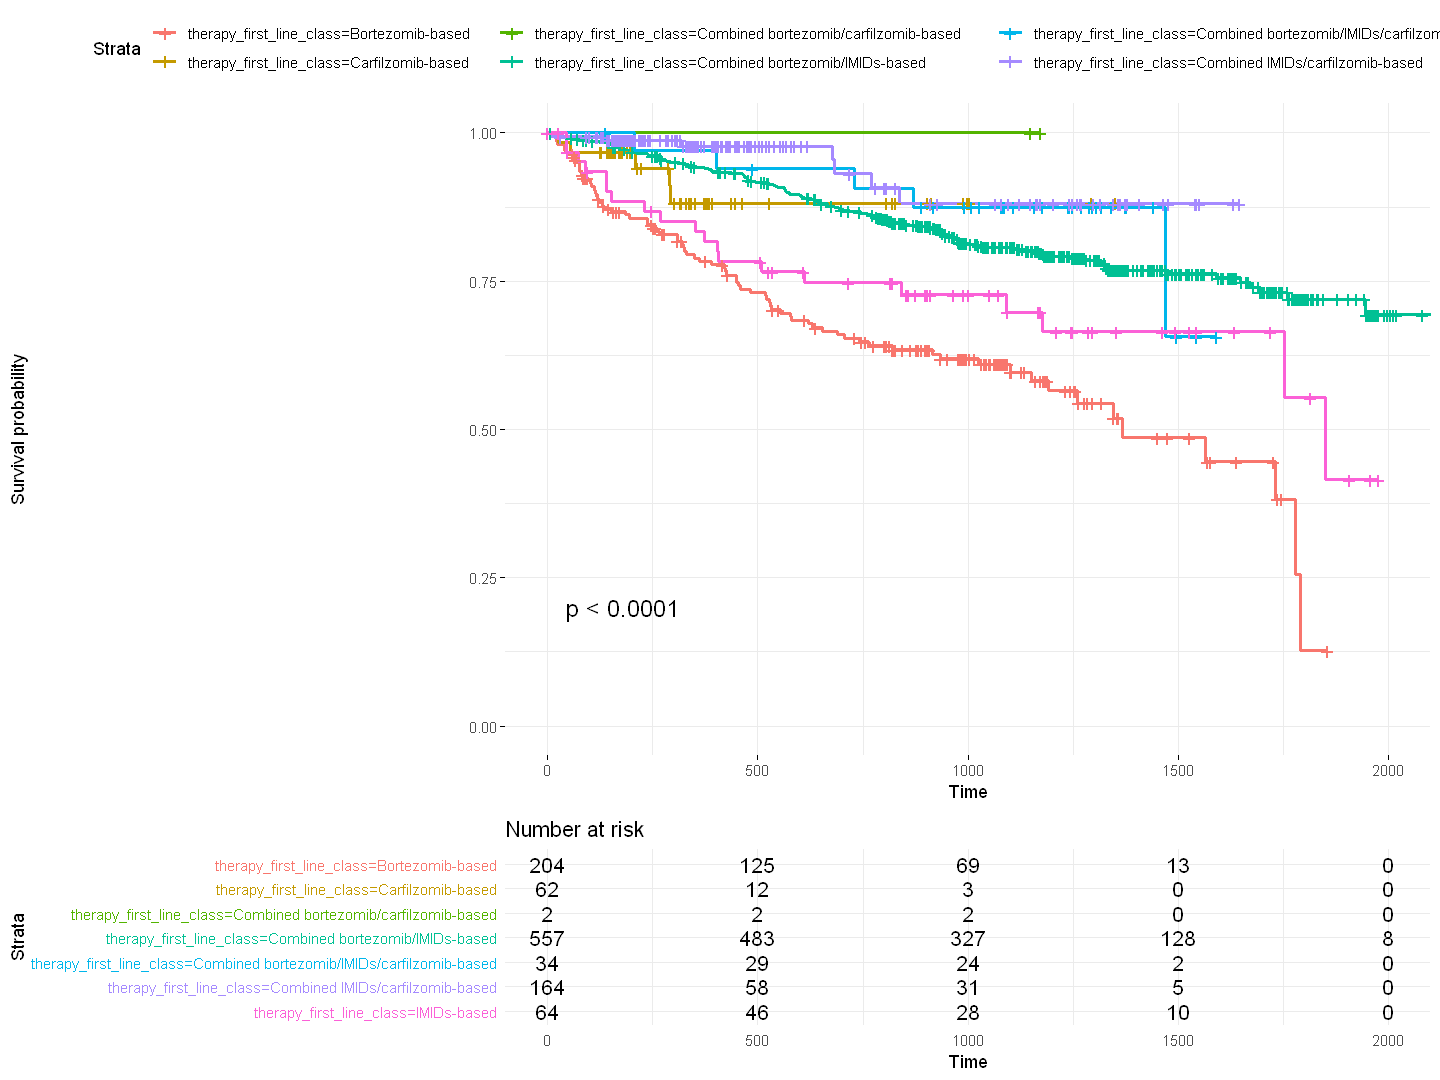

In [6]:
event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)
time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_overall_survival.tsv', sep='\t')
sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'response_best_response_first_line', 'therapy_first_line')]
therapy_class = read.csv('data/mmrf/therapy/therapy_first_line_class.tsv', sep='\t')
df = merge(merge(merge(event, time, by='ID'), sensitivity, by='ID'), therapy_class, by='ID')
df$status <- ifelse(df$disease_status == 'Died', 1, 0)

fit <- survfit(Surv(days_to_overall_survival, status) ~ therapy_first_line_class, data = df)

options(repr.plot.width=12, repr.plot.height=9)

p <- ggsurvplot(fit, data = df, ggtheme = theme_minimal(), risk.table = TRUE, pval = TRUE);

ggsave('images/survival_therapy_first_line_class.png', print(p), units='cm', heigh=17, width=30, bg="transparent")

p

In [7]:
event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)
time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_disease_progression.tsv', sep='\t')
sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'response_best_response_first_line', 'therapy_first_line')]
df = merge(merge(event, time, by='ID'), sensitivity, by='ID')
df$status <- ifelse(df$disease_status == 'Died', 1, 0)

model_parameters <- read.csv('output/result_10_fold.csv', sep=',', header=T)[c('fold', 'n_genes', 'y_train_hat_min', 'y_train_hat_max')]

model_predictions <- read.csv('output/inference_valid_10_fold.csv', sep=',', header=T)
colnames(model_predictions)[5] <- 'n_genes'

print(model_predictions)

model_predictions <- merge(model_parameters, model_predictions, by=c('fold', 'n_genes'))

model_predictions$y_hat_adjusted <- (model_predictions$y_hat - model_predictions$y_train_hat_min) / 
                                    (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)

model_predictions$y_hat_hard <- ifelse(model_predictions$y_hat >= model_predictions$threshold , 1, 0)

model_predictions$X <- NULL

model_predictions <- model_predictions[model_predictions$y_true == model_predictions$y_hat_hard,]

best <- read.csv('output/best_result_per_10_fold.csv', sep=',', header=T)

model_predictions <- merge(best, model_predictions, by=c('fold', 'n_genes'))

df <- merge(model_predictions[c('ID', 'y_hat_hard')], df, by=c('ID'))
colnames(df)[2] <- 'model'

fit <- coxph(Surv(days_to_disease_progression, status) ~ model, data = df)

#print(summary(fit))

fit <- survfit(Surv(days_to_disease_progression, status) ~ model, data = df)
options(repr.plot.width=12, repr.plot.height=5)
p <- ggsurvplot(fit, data=df, ggtheme = theme_minimal(), risk.table = TRUE, pval = TRUE);

# ggsave('images/survival_sensitivity.png', print(p), units='cm', heigh=12, width=26, bg="transparent")

p

Warning message in file(file, "rt"):
"não foi possível abrir o arquivo 'output/result_10_fold.csv': No such file or directory"

ERROR: Error in file(file, "rt"): não é possível abrir a conexão


In [ ]:
df

In [ ]:
event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)

time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_overall_survival.tsv', sep='\t')

sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'response_best_response_first_line', 'therapy_first_line')]

therapy_class = read.csv('data/mmrf/therapy/therapy_first_line_class.tsv', sep='\t')

sim = read.csv('output/simulation_result.csv', sep=',')[c('ID', 'new_therapy')]

df = merge(merge(merge(merge(event, time, by='ID'), sensitivity, by='ID'), therapy_class), sim, by='ID')
df$status <- ifelse(df$disease_status == 'Died', 1, 0)

model_parameters <- read.csv('output/result_10_fold.csv', sep=',', header=T)[c('fold', 'n_genes', 'y_train_hat_min', 'y_train_hat_max')]

model_predictions <- read.csv('output/inference_valid_10_fold.csv', sep=',', header=T)

colnames(model_predictions)[5] <- 'n_genes'

model_predictions <- merge(model_parameters, model_predictions, by=c('fold', 'n_genes'))

model_predictions$y_hat_adjusted <- (model_predictions$y_hat - model_predictions$y_train_hat_min) / 
                                    (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)

model_predictions$threshold_adjusted <- (model_predictions$threshold - model_predictions$y_train_hat_min) / 
                                        (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)

model_predictions$y_hat_hard <- ifelse(model_predictions$y_hat_adjusted >= model_predictions$threshold_adjusted, 1, 0)

model_predictions$X <- NULL

best <- read.csv('output/best_result_per_10_fold.csv', sep=',', header=T)
model_predictions <- merge(best, model_predictions, by=c('fold', 'n_genes'))

df <- merge(model_predictions[c('ID', 'y_hat_hard', 'y_true', 'y_hat_adjusted', 'therapy')], df, by=c('ID'))
colnames(df)[2] <- 'model'

q <- quantile(df$y_hat_adjusted, probs = seq(0, 1, 0.25))

ddd <<- data.frame(q1=q[1:(length(q)-1)], q2=q[2:length(q)])

qqq <- function(x) {
    
    r = NA
    
    for (i in seq_len(nrow(ddd)))
        if (x >= ddd[i,]$q1 && x < ddd[i,]$q2)
            return(i)
    
    return(nrow(ddd))
}

hard <- function(x) {    
    return(as.integer(x * 1))
}
df = df[!is.na(df$therapy) & df$therapy != '',]
df$ther <- ifelse(!grepl('len', df$therapy, fixed=TRUE), 'bor', 'non-bor')

df$quant <- unlist(lapply(df$y_hat_adjusted, qqq))

df$days_to_overall_survival <- as.integer(df$days_to_overall_survival / 30)

fit <- survfit(Surv(days_to_overall_survival, status) ~ new_therapy, data = df)

options(repr.plot.width=12, repr.plot.height=9)

p <- ggsurvplot(fit, data=df, ggtheme = theme_minimal(), risk.table = TRUE, pval = TRUE);

#ggsave(paste('images/survival_quantile_', t, '.png', sep=''), print(p), units='cm', heigh=16, width=26, bg="transparent")

print(p)


In [ ]:
event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)
event = event[!is.na(event$disease_status),]

time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_first_response.tsv', sep='\t')
time = time[!is.na(time$days_to_first_response),]
time$days_to_first_response = as.integer(time$days_to_first_response)

therapy_class = read.csv('data/mmrf/therapy/therapy_first_line_class.tsv', sep='\t')

sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'response_best_response_first_line', 'therapy_first_line')]

sim = read.csv('output/simulation_result.csv', sep=',')[c('ID', 'new_therapy')]

df = merge(merge(merge(merge(event, time, by='ID'), sensitivity, by='ID'), therapy_class), sim, by='ID')
df$status <- ifelse(df$disease_status == 'Died', 1, 0)

#
# Loading model parameters
#
model_parameters <- read.csv('output/result_10_fold.csv', sep=',', header=T)[c('fold', 'n_genes', 'y_train_hat_min', 'y_train_hat_max')]

#
# Loading model predictions
#
model_predictions <- read.csv('output/inference_valid_10_fold.csv', sep=',', header=T)
colnames(model_predictions)[5] <- 'n_genes'
model_predictions <- merge(model_parameters, model_predictions, by=c('fold', 'n_genes'))
model_predictions$y_hat_adjusted <- (model_predictions$y_hat - model_predictions$y_train_hat_min) / 
                                    (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$threshold_adjusted <- (model_predictions$threshold - model_predictions$y_train_hat_min) / 
                                        (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$y_hat_hard <- ifelse(model_predictions$y_hat_adjusted >= model_predictions$threshold_adjusted, 1, 0)
model_predictions$X <- NULL

best <- read.csv('output/best_result_per_10_fold.csv', sep=',', header=T)
model_predictions <- merge(best, model_predictions, by=c('fold', 'n_genes'))

df <- merge(model_predictions[c('ID', 'y_hat_hard', 'y_true')], df, by=c('ID'))
colnames(df)[2] <- 'model'

options(repr.plot.width=12, repr.plot.height=5)

for (t in unique(df$therapy_first_line)) {
    
    df_tmp = df[df$therapy_first_line == t,]    
    t = as.character(ifelse(t == "" | is.na(t), "Non-therapy", t))
    print(t)
    print(wilcox.test(df_tmp[df_tmp$new_therapy == 0,]$days_to_first_response, df_tmp[df_tmp$new_therapy == 1,]$days_to_first_response, alternative="t")$p.value)
    
    #f <- coxph(Surv(days_to_disease_progression, status) ~ new_therapy, data = df_tmp)
    #p <- ggsurvplot(f, data=df_tmp, ggtheme = theme_minimal(), risk.table = TRUE, pval = TRUE) + ggtitle(t);
    #print(t)
    #print(summary(f)$coefficients)
    #print(p)
}

In [ ]:
event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)
event = event[!is.na(event$disease_status),]

time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_disease_progression.tsv', sep='\t')
time = time[!is.na(time$days_to_disease_progression),]

therapy_class = read.csv('data/mmrf/therapy/therapy_first_line_class.tsv', sep='\t')

sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'response_best_response_first_line', 'therapy_first_line')]

sim = read.csv('output/simulation_result.csv', sep=',')[c('ID', 'new_therapy')]

df = merge(merge(merge(merge(event, time, by='ID'), sensitivity, by='ID'), therapy_class), sim, by='ID')
df$status <- ifelse(df$disease_status == 'Died', 1, 0)

#
# Loading model parameters
#
model_parameters <- read.csv('output/result_10_fold.csv', sep=',', header=T)[c('fold', 'n_genes', 'y_train_hat_min', 'y_train_hat_max')]

#
# Loading model predictions
#
model_predictions <- read.csv('output/inference_valid_10_fold.csv', sep=',', header=T)
colnames(model_predictions)[5] <- 'n_genes'
model_predictions <- merge(model_parameters, model_predictions, by=c('fold', 'n_genes'))
model_predictions$y_hat_adjusted <- (model_predictions$y_hat - model_predictions$y_train_hat_min) / 
                                    (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$threshold_adjusted <- (model_predictions$threshold - model_predictions$y_train_hat_min) / 
                                        (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$y_hat_hard <- ifelse(model_predictions$y_hat_adjusted >= model_predictions$threshold_adjusted, 1, 0)
model_predictions$X <- NULL

best <- read.csv('output/best_result_per_10_fold.csv', sep=',', header=T)
model_predictions <- merge(best, model_predictions, by=c('fold', 'n_genes'))

df <- merge(model_predictions[c('ID', 'y_hat_hard', 'y_true')], df, by=c('ID'))
colnames(df)[2] <- 'model'

options(repr.plot.width=12, repr.plot.height=5)

for (t in unique(df$therapy_first_line_class)) {
    
    df_tmp = df[df$therapy_first_line_class == t,]
    
    fit <- coxph(Surv(days_to_disease_progression, status) ~ new_therapy, data = df_tmp)
    
    print(summary(fit))
    
    t = as.character(ifelse(t == "" | is.na(t), "Non-therapy", t))
    f <- survfit(Surv(days_to_disease_progression, status) ~ new_therapy, data = df_tmp)
    p <- ggsurvplot(f, data=df_tmp, ggtheme = theme_minimal(), risk.table = TRUE, pval = TRUE) + ggtitle(t);

    print(p)
}

In [ ]:
time

In [ ]:
event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)
event = event[!is.na(event$disease_status),]

time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_disease_progression.tsv', sep='\t')
time = time[!is.na(time$days_to_disease_progression),]
# time$days_to_disease_progression = as.integer(time$days_to_disease_progression / 31)

therapy_class = read.csv('data/mmrf/therapy/therapy_first_line_class.tsv', sep='\t')

sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'response_best_response_first_line', 'therapy_first_line')]

sim = read.csv('output/simulation_result.csv', sep=',')[c('ID', 'new_therapy')]

df = merge(merge(merge(merge(event, time, by='ID'), sensitivity, by='ID'), therapy_class), sim, by='ID')
df$status <- ifelse(df$disease_status == 'Died', 1, 0)

#
# Loading model parameters
#
model_parameters <- read.csv('output/result_10_fold.csv', sep=',', header=T)[c('fold', 'n_genes', 'y_train_hat_min', 'y_train_hat_max')]

#
# Loading model predictions
#
model_predictions <- read.csv('output/inference_valid_10_fold.csv', sep=',', header=T)
colnames(model_predictions)[5] <- 'n_genes'
model_predictions <- merge(model_parameters, model_predictions, by=c('fold', 'n_genes'))
model_predictions$y_hat_adjusted <- (model_predictions$y_hat - model_predictions$y_train_hat_min) / 
                                    (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$threshold_adjusted <- (model_predictions$threshold - model_predictions$y_train_hat_min) / 
                                        (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$y_hat_hard <- ifelse(model_predictions$y_hat_adjusted >= model_predictions$threshold_adjusted, 1, 0)
model_predictions$X <- NULL

best <- read.csv('output/best_result_per_10_fold.csv', sep=',', header=T)
model_predictions <- merge(best, model_predictions, by=c('fold', 'n_genes'))

df <- merge(model_predictions[c('ID', 'y_hat_hard', 'y_true')], df, by=c('ID'))
colnames(df)[2] <- 'model'

options(repr.plot.width=12, repr.plot.height=5)

for (t in unique(df$therapy_first_line)) {
    
    df_tmp = df[df$therapy_first_line == t,]
    
    fit <- survfit(Surv(days_to_disease_progression, status) ~ new_therapy, data = df_tmp, type='kaplan-meier', error='greenwood')
    
    t = as.character(ifelse(t == "" | is.na(t), "Non-therapy", t))
    
    p <- ggsurvplot(fit, data=df_tmp, ggtheme = theme_minimal(), log.rank.weights = "1", risk.table = TRUE, pval = TRUE) + ggtitle(t);

    # ggsave(paste(paste('images/survival_', t, sep=''), '_and_simulation.pdf', sep=''), print(p), units='cm', heigh=10, width=15, bg="transparent")

    print(p)
}

In [ ]:
event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)
time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_disease_progression.tsv', sep='\t')
therapy_class = read.csv('data/mmrf/therapy/therapy_first_line_class.tsv', sep='\t')
sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'response_best_response_first_line', 'therapy_first_line')]
sim = read.csv('output/simulation_result.csv', sep=',')[c('ID', 'new_therapy')]
df = merge(merge(merge(merge(event, time, by='ID'), sensitivity, by='ID'), therapy_class), sim, by='ID')
df <- df[!is.na(df$disease_status) & df$disease_status != '',]
df <- df[!is.na(df$days_to_disease_progression),]
df <- df[df$days_to_disease_progression > 0,]
df$status <- ifelse(df$disease_status == 'Died', 1, 0)

model_parameters <- read.csv('output/result_10_fold.csv', sep=',', header=T)[c('fold', 'n_genes', 'y_train_hat_min', 'y_train_hat_max')]

model_predictions <- read.csv('output/inference_valid_10_fold.csv', sep=',', header=T)
colnames(model_predictions)[5] <- 'n_genes'
model_predictions <- merge(model_parameters, model_predictions, by=c('fold', 'n_genes'))
model_predictions$y_hat_adjusted <- (model_predictions$y_hat - model_predictions$y_train_hat_min) / 
                                    (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$threshold_adjusted <- (model_predictions$threshold - model_predictions$y_train_hat_min) / 
                                        (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$y_hat_hard <- ifelse(model_predictions$y_hat_adjusted >= model_predictions$threshold_adjusted, 1, 0)

model_predictions$X <- NULL

best <- read.csv('output/best_result_per_10_fold.csv', sep=',', header=T)
model_predictions <- merge(best, model_predictions, by=c('fold', 'n_genes'))

df <- merge(model_predictions[c('ID', 'y_hat_hard', 'y_true')], df, by=c('ID'))
colnames(df)[2] <- 'model'

options(repr.plot.width=12, repr.plot.height=12)

fit <- survfit(Surv(days_to_disease_progression, status) ~ new_therapy + therapy_first_line, data = df)

p <- ggsurvplot(fit, pval=T, risk.table=T);

print(p)

In [ ]:
event = read.csv('data/mmrf/clinical_outcome/disease_status.tsv', sep='\t', stringsAsFactors=FALSE)
event = event[!is.na(event$disease_status),]

time = read.csv('data/mmrf/clinical_outcome/time_to_endpoint/days_to_overall_survival.tsv', sep='\t')
time = time[!is.na(time$days_to_overall_survival),]
time$days_to_overall_survival = as.integer(time$days_to_overall_survival / 31)

therapy_class = read.csv('data/mmrf/therapy/therapy_first_line_class.tsv', sep='\t')

sensitivity = read.csv('data/input.tsv', sep='\t')[c('ID', 'response_best_response_first_line', 'therapy_first_line')]

sim = read.csv('output/simulation_result.csv', sep=',')[c('ID', 'new_therapy')]

df = merge(merge(merge(merge(event, time, by='ID'), sensitivity, by='ID'), therapy_class), sim, by='ID')
df$status <- ifelse(df$disease_status == 'Died', 1, 0)

#
# Loading model parameters
#
model_parameters <- read.csv('output/result_10_fold.csv', sep=',', header=T)[c('fold', 'n_genes', 'y_train_hat_min', 'y_train_hat_max')]

#
# Loading model predictions
#
model_predictions <- read.csv('output/inference_valid_10_fold.csv', sep=',', header=T)
colnames(model_predictions)[5] <- 'n_genes'
model_predictions <- merge(model_parameters, model_predictions, by=c('fold', 'n_genes'))
model_predictions$y_hat_adjusted <- (model_predictions$y_hat - model_predictions$y_train_hat_min) / 
                                    (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$threshold_adjusted <- (model_predictions$threshold - model_predictions$y_train_hat_min) / 
                                        (model_predictions$y_train_hat_max - model_predictions$y_train_hat_min)
model_predictions$y_hat_hard <- ifelse(model_predictions$y_hat_adjusted >= model_predictions$threshold_adjusted, 1, 0)
model_predictions$X <- NULL

best <- read.csv('output/best_result_per_10_fold.csv', sep=',', header=T)
model_predictions <- merge(best, model_predictions, by=c('fold', 'n_genes'))

df <- merge(model_predictions[c('ID', 'y_hat_hard', 'y_true')], df, by=c('ID'))
colnames(df)[2] <- 'model'

df$ther <- ifelse(grepl('bor', tolower(df$therapy_first_line), fixed=TRUE), 'bor', 'non-bor')

options(repr.plot.width=12, repr.plot.height=5)

for (t in unique(df$ther)) {
    
    df_tmp = df[df$ther == t,]
    
    fit <- coxph(Surv(days_to_overall_survival, status) ~ new_therapy, data = df_tmp)
    
    t = as.character(ifelse(t == "" | is.na(t), "Non-therapy", t))
    f <- survfit(Surv(days_to_overall_survival, status) ~ new_therapy, data = df_tmp)
    p <- ggsurvplot(f, data=df_tmp, ggtheme = theme_minimal(), log.rank.weights = "1", risk.table = TRUE, pval = TRUE) + ggtitle(t);

    print(p)
}